# Personality Analysis by Gender
This notebook contains the code to perform personality analysis across genders (specifically, male and female). All data resides in the *data* folder, but due to the size restrictions these files are not present in the repo.

## Preprocessing

In [188]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import json
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load all speakers from parquet file
speakers = pd.read_parquet('data/speaker_attributes.parquet')

In [3]:
speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


We will start by separating speakers into male and female speakers.

In [4]:
MALE_QID = 'Q6581097'
FEMALE_QID = 'Q6581072'
male_speakers = speakers[speakers.gender.apply(lambda g: MALE_QID in g if g is not None else False)]
female_speakers = speakers[speakers.gender.apply(lambda g: FEMALE_QID in g if g is not None else False)]

In [5]:
male_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [6]:
female_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
14,"[Mary Louise Streep, Meryl Louise Streep, Stre...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1388232380,None,None,"[Q10800557, Q2259451, Q10798782, Q2405480, Q33...",[Q29552],None,Q873,Meryl Streep,None,item,[Q7066]
19,"[Indira Nehru, Indira Priyadarshini Gandhi, In...",[+1917-11-19T00:00:00Z],"[Q668, Q129286, Q1775277]",[Q6581072],1390256502,[Q1996554],None,[Q82955],[Q10225],None,Q1149,Indira Gandhi,"[Q3532192, Q3531393]",item,[Q9089]
59,None,[+1946-10-06T00:00:00Z],[Q17],[Q6581072],1392610476,None,None,"[Q33999, Q10800557]",None,None,Q3319,Yukiko Kobayashi,None,item,None
60,[Anne Sophie Mutter],[+1963-06-29T00:00:00Z],[Q183],[Q6581072],1387877604,None,None,"[Q1259917, Q16145150]",None,None,Q3374,Anne-Sophie Mutter,None,item,None
76,"[Emily Elizabeth Dickinson, Ai-mi-li Ti-chin-s...",[+1830-12-10T00:00:00Z],[Q30],[Q6581072],1390035803,None,None,"[Q36180, Q49757]",None,None,Q4441,Emily Dickinson,None,item,None


Let's see how many male and female speakers we have in the dataset.

In [7]:
len(male_speakers), len(female_speakers)

(5419708, 1685185)

Whoa! Seems like women are quite underrepresented in the media as well. But this is for another project to analyze. We will mainly focus on the personalities of these people.
In the milestone 2, we preprocessed our quotes and saved the speaker data on the number of significant quotes in a file. Since we will consider people who have significant number of quotes in the dataset, we will load this file and merge with our male and female speakers.

In [8]:
with open('data/signi-quote-count-combined_1636253317430.json') as f:
    signi_quote_count_dict = json.load(f)

In [9]:
len(signi_quote_count_dict)

624492

In [12]:
# This file essentially contains the number of significant quotes per speaker
list(signi_quote_count_dict.items())[:5]

[('Q22686', 201293),
 ('Q1058', 76404),
 ('Q76', 59650),
 ('Q450675', 37218),
 ('Q83106', 33025)]

In [13]:
# Convert this dict to a pandas Series for later processing
signi_quote_count_df = pd.Series(signi_quote_count_dict, name='signi_quote_count')

In [14]:
signi_quote_count_df.head()

Q22686     201293
Q1058       76404
Q76         59650
Q450675     37218
Q83106      33025
Name: signi_quote_count, dtype: int64

Now we will merge both male and female speakers data with the significant quotes data to find people who have significant number of quotes on both sides. But the number of these speakers will still be high and since we are going to combine their quotes later for LIWC analysis (it will be really huge and LIWC can't process huge files), we can't take all of them. Instead, we will take 500 top speakers from both sides.s

In [15]:
# Merge male and female speakers with the data for significant quotes and choose the top 500 people from both 
TOP_K = 500
signi_male_speakers = male_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_male_speakers = signi_male_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:TOP_K]
signi_female_speakers = female_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_female_speakers = signi_female_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:TOP_K]

In [16]:
signi_male_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293
18,"[Namo, Modi, Narendra Bhai, Narendra Damodarda...",[+1950-09-17T00:00:00Z],[Q668],[Q6581097],1395415052,"[Q1282294, Q6889284]",None,"[Q82955, Q36180, Q7019111, Q10429346]",[Q10230],None,Q1058,Narendra Modi,"[Q63988227, Q63988919, Q16841231, Q16251961, Q...",item,[Q9089],76404
7926268,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",59650
4545725,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,Francis,None,item,[Q9592],37218
2864,"[Jürgen Norbert Klopp, Jurgen Klopp, Juergen K...",[+1967-06-16T00:00:00Z],[Q183],[Q6581097],1389758184,None,None,"[Q937857, Q628099]",None,None,Q83106,Jürgen Klopp,None,item,[Q75809],33025


In [17]:
signi_female_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
1135081,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],[Q30],[Q6581072],1393846565,None,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,Hillary Clinton,"[Q699872, Q4791768]",item,[Q33203],28126
6800188,"[Nancy Patricia D'Alesandro Pelosi, Nancy Patr...",[+1940-03-26T00:00:00Z],[Q30],[Q6581072],1392905094,[Q974693],P000197,[Q82955],[Q29552],None,Q170581,Nancy Pelosi,"[Q28404971, Q28122293, Q52494157]",item,[Q1841],20783
1145081,"[Theresa Mary Brasier, Prime Minister Theresa ...",[+1956-10-01T00:00:00Z],[Q145],[Q6581072],1392235818,[Q7994501],None,[Q82955],[Q9626],None,Q264766,Theresa May,"[Q30173038, Q215622, Q590740, Q428598, Q918503...",item,[Q6423963],19450
4544778,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1394365746,[Q49078],W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,Elizabeth Warren,[Q28220813],item,[Q33203],16937
2284181,[Mamata Bandyopadhyay],"[+1955-01-05T00:00:00Z, +1960-10-05T00:00:00Z]",[Q668],[Q6581072],1377224970,None,None,"[Q82955, Q1028181, Q36834, Q822146]","[Q10225, Q912899]",None,Q465041,Mamata Banerjee,None,item,[Q9089],16321


Now that we have identified the speakers we want to analyze, we will proceed with collecting the quotes for those speakers from the Quotebank dataset. We will use our processing functions from the milestone 2 (moved to *helpers.py* for reusability) and save these files since the execution of the next cell takes about 2hrs. We are also only considering the last 5 years of data.

<font color='red'>WARNING: LONG EXECUTION!</font>

In [33]:
from functools import partial

years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_female_speakers.id.to_list() + signi_male_speakers.id.to_list() 
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/male-female-quotes500', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

Processing year 2015: 3189it [17:11,  3.09it/s]



File data/quotebank/quotes-2015.json.bz2 processed in 1034.3s



Processing year 2016: 2217it [12:09,  3.04it/s]



File data/quotebank/quotes-2016.json.bz2 processed in 731.0s



Processing year 2017: 4962it [25:09,  3.29it/s]



File data/quotebank/quotes-2017.json.bz2 processed in 1512.9s



Processing year 2018: 4589it [24:56,  3.07it/s]



File data/quotebank/quotes-2018.json.bz2 processed in 1500.7s



Processing year 2019: 3397it [18:08,  3.12it/s]



File data/quotebank/quotes-2019.json.bz2 processed in 1090.9s



Processing year 2020: 793it [04:08,  3.19it/s]



File data/quotebank/quotes-2020.json.bz2 processed in 249.5s



Output file names:
data/male-female-quotes500-2015_1639434508214.json
data/male-female-quotes500-2016_1639435240907.json
data/male-female-quotes500-2017_1639436752410.json
data/male-female-quotes500-2018_1639438253392.json
data/male-female-quotes500-2019_1639439346471.json
data/male-female-quotes500-2020_1639439598559.json


In [20]:
# Since in later executions we do not need run the previous cell, we simply load the generated file names here
output_list = ["data/male-female-quotes500-2015_1639434508214.json",
               "data/male-female-quotes500-2016_1639435240907.json",
               "data/male-female-quotes500-2017_1639436752410.json",
               "data/male-female-quotes500-2018_1639438253392.json",
               "data/male-female-quotes500-2019_1639439346471.json",
               "data/male-female-quotes500-2020_1639439598559.json"
              ]

Now we have generated quotes files for all those 1000 speakers (500 males, 500 females) and saved them by year. Since we are not considering a longitudinal analysis for this scenario, we will just combine all these data for easier processing.

In [21]:
male_female_combined = combine_quotes_files(output_list)

Next, we are going to filter out weird, non-sensical quotes to get a clean data.

In [22]:
male_female_quotes, filtered_quotes = filter_quotes(male_female_combined)

In [23]:
# Some filtered out quote examples
filtered_quotes[:5]

[{'quotation': '* $% ^ ## Derby...', 'proba': '0.8724'},
 {'quotation': 'I urge everyone to go to http://www.RailDrishti.in, and see the live camera feed of the IRCTC kitchen. You can check the hygiene of the food preparation through the website,',
  'proba': '0.8587'},
 {'quotation': 'Paris Attacks: Read Why This Woman Refuses To Change Her Facebook Profile Picture To France... https://t.co/QXeuWDiWil',
  'proba': '0.9606'},
 {'quotation': 'This is international cricket and Shikhar will play numerous number of innings. We will have to be patient. He is an impact player and we have to give him as much confidence as we can possibly. When he gets going, he will win us matches. Post-match presentation https://t.co/HBycRQDUDN #bcci via @BCCI #INDvsSA -- DC Sports (@_DCSports) November 18, 2015 He is not out of form. He is batting beautifully and hitting the ball well. We should not put too much pressure on him. Had there been some game, he could have possibly scored a hundred,',
  'proba':

Next for each speaker, we will concatenate their quotes so that we end up with a one text input per speaker. However, for fair comparison and for efficient processing, we will cap the quote length to 10,000 characters which should be more than enough to generate personality scores from.

In [24]:
QUOTE_LENGTH = 10000
male_female_quotes_concat = concatenate_quotes(male_female_quotes, quote_length=QUOTE_LENGTH)

In [50]:
# We will save this file for later easy retrieval
write_json_to_file('data/male-female-quotes500-concatenated', male_female_quotes_concat)

'data/male-female-quotes500-concatenated_1639440816925.json'

In [25]:
# Convert the concatenated quotes dict into pandas Series
male_female_quotes_df = pd.Series(male_female_quotes_concat, name='quotations')

In [26]:
male_female_quotes_df.head()

Q1253         profound and continuing concernâ € for civili...
Q2376327      I've seen a lot. I just watch and watch and w...
Q7199798      In the last 13 months there has been a condol...
Q13427287     Market Power and Entry Analysis in Developing...
Q17811880     It is with tremendous gratitude and appreciat...
Name: quotations, dtype: object

Now we will merge our quotes file with the earlier significant male and female speaker data to prepare for the final analysis.

In [27]:
male_speaker_quotes = signi_male_speakers.merge(male_female_quotes_df, left_on='id', right_index=True, how='inner')
female_speaker_quotes = signi_female_speakers.merge(male_female_quotes_df, left_on='id', right_index=True, how='inner')

In [28]:
male_speaker_quotes.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count,quotations
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293,Under what pretext did Israel's survival beco...
18,"[Namo, Modi, Narendra Bhai, Narendra Damodarda...",[+1950-09-17T00:00:00Z],[Q668],[Q6581097],1395415052,"[Q1282294, Q6889284]",None,"[Q82955, Q36180, Q7019111, Q10429346]",[Q10230],None,Q1058,Narendra Modi,"[Q63988227, Q63988919, Q16841231, Q16251961, Q...",item,[Q9089],76404,"One, Africa will be at the top of our priorit..."
7926268,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",59650,Namaste! Thank you Prime Minister Modi for yo...
4545725,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,Francis,None,item,[Q9592],37218,It must never be forgotten that political and...
2864,"[Jürgen Norbert Klopp, Jurgen Klopp, Juergen K...",[+1967-06-16T00:00:00Z],[Q183],[Q6581097],1389758184,None,None,"[Q937857, Q628099]",None,None,Q83106,Jürgen Klopp,None,item,[Q75809],33025,Rhian Brewster is just 18 years old. During t...


In [29]:
female_speaker_quotes.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count,quotations
1135081,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],[Q30],[Q6581072],1393846565,None,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,Hillary Clinton,"[Q699872, Q4791768]",item,[Q33203],28126,Donors in Saudi Arabia constitute the most si...
6800188,"[Nancy Patricia D'Alesandro Pelosi, Nancy Patr...",[+1940-03-26T00:00:00Z],[Q30],[Q6581072],1392905094,[Q974693],P000197,[Q82955],[Q29552],None,Q170581,Nancy Pelosi,"[Q28404971, Q28122293, Q52494157]",item,[Q1841],20783,Good evening. I appreciate the opportunity to...
1145081,"[Theresa Mary Brasier, Prime Minister Theresa ...",[+1956-10-01T00:00:00Z],[Q145],[Q6581072],1392235818,[Q7994501],None,[Q82955],[Q9626],None,Q264766,Theresa May,"[Q30173038, Q215622, Q590740, Q428598, Q918503...",item,[Q6423963],19450,"The Cabinet has just had a long, detailed and..."
4544778,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1394365746,[Q49078],W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,Elizabeth Warren,[Q28220813],item,[Q33203],16937,We need to talk about what we believe: • We b...
2284181,[Mamata Bandyopadhyay],"[+1955-01-05T00:00:00Z, +1960-10-05T00:00:00Z]",[Q668],[Q6581072],1377224970,None,None,"[Q82955, Q1028181, Q36834, Q822146]","[Q10225, Q912899]",None,Q465041,Mamata Banerjee,None,item,[Q9089],16321,It is reported that in many examination centr...


Next we will save the quotations to run through LIWC offline to generate speaker->word category matrix.

In [57]:
male_speaker_quotes[['id', 'quotations']].to_csv('data/male_quotes500.csv', index=False)

In [58]:
female_speaker_quotes[['id', 'quotations']].to_csv('data/female_quotes500.csv', index=False)

## Personality Analysis

Let's load our LIWC results and generate personality scores.

In [163]:
male_quotes_liwc = pd.read_csv('data/male_quotes500_liwc.csv')
female_quotes_liwc = pd.read_csv('data/female_quotes500_liwc.csv')

In [164]:
male_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q22686,Under what pretext did Israel's survival beco...,1683,21.58,25.43,66.84,7.49,0.65,3.09,3.74,...,4.04,0.18,0.06,0.24,0.00,2.97,0.0,1.19,0.00,0.06
1,Q1058,"One, Africa will be at the top of our priorit...",1757,22.24,22.08,61.24,5.29,0.74,2.50,3.24,...,2.68,0.23,0.57,0.00,0.00,0.68,0.0,0.63,0.68,0.28
2,Q76,Namaste! Thank you Prime Minister Modi for yo...,1710,21.38,23.04,68.48,7.66,1.93,3.86,5.79,...,5.44,0.00,0.18,0.00,0.06,0.41,0.0,2.05,0.00,0.00
3,Q450675,It must never be forgotten that political and...,1761,19.79,20.44,73.03,7.16,1.65,1.59,3.24,...,6.87,0.51,0.34,0.62,0.34,0.68,0.0,0.40,0.11,0.62
4,Q83106,Rhian Brewster is just 18 years old. During t...,1793,17.58,16.68,74.90,11.10,1.17,3.51,4.68,...,4.24,0.11,0.11,0.28,0.11,3.85,0.0,1.84,0.11,9.70


In [165]:
female_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q6294,Donors in Saudi Arabia constitute the most si...,1707,25.86,23.55,64.67,6.80,2.11,1.76,3.87,...,4.22,0.76,0.12,0.12,0.00,1.00,0.0,0.82,0.94,0.88
1,Q170581,Good evening. I appreciate the opportunity to...,1672,19.44,23.09,67.64,7.42,0.78,2.75,3.53,...,5.02,0.84,0.42,0.00,0.18,2.03,0.0,3.29,0.36,0.78
2,Q264766,"The Cabinet has just had a long, detailed and...",1742,22.62,23.19,71.64,8.44,1.44,3.33,4.76,...,3.90,0.17,0.23,0.06,0.00,0.98,0.0,1.55,0.00,0.23
3,Q434706,We need to talk about what we believe: • We b...,1808,19.44,16.65,72.46,9.07,1.05,3.87,4.92,...,6.80,0.39,0.06,0.28,0.06,1.11,0.0,3.21,0.00,1.22
4,Q465041,It is reported that in many examination centr...,1689,15.93,24.04,61.63,6.28,1.84,1.01,2.84,...,3.97,0.24,0.06,0.53,0.12,1.30,0.0,0.77,0.83,0.18


In [166]:
# Generate personality scores
male_personality = predict_personality(male_quotes_liwc)
female_personality = predict_personality(female_quotes_liwc)

In [167]:
male_personality.head()

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,0.653831,0.393681,1.684541,-0.416271,-0.043090,-0.535734,0.095104,2.901841,4.860519,4.860278,...,2.835919,1.138677,1.834311,-0.772972,2.011175,0.630115,1.415950,-0.344240,-0.811962,0.403087
1,0.061088,-0.071468,1.141742,-1.132739,-0.557964,-0.825372,-0.144957,2.676373,5.295333,4.724141,...,4.204391,1.368455,2.303234,-0.083134,2.679588,0.887011,1.816737,-0.003491,-0.071744,1.043267
2,0.881848,0.684800,1.812147,-0.517812,-0.043196,-0.452747,0.583726,3.058496,5.130206,5.284213,...,3.417897,1.072869,2.129279,-0.838343,2.150607,1.033460,1.640677,-0.487366,-0.785797,0.483270
3,1.158200,0.559545,2.145749,0.227255,0.164464,-0.197769,0.214040,3.104805,4.285311,4.303567,...,2.412497,1.013444,2.098923,-1.489420,1.677183,0.517837,0.762050,-1.426858,-1.310748,0.147964
4,0.759162,0.678860,1.947304,-0.200721,0.059427,-0.421840,0.362344,3.274971,5.643163,6.419120,...,2.538383,1.379207,1.485347,-0.916230,1.567009,0.841368,1.894064,-0.395322,-0.867206,0.339430


In [168]:
female_personality.head()

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,1.062090,0.453800,1.924611,-0.315371,0.606995,-0.222193,0.484111,2.267530,4.290328,4.125043,...,3.245250,1.062263,2.070812,-1.121330,2.091796,0.904145,1.305527,-0.585233,-1.095941,0.386960
1,0.779683,0.441777,1.987654,-0.102271,0.161866,-0.556851,0.086725,2.964640,4.440710,4.823731,...,2.445892,1.024691,1.664990,-1.053955,1.779378,0.751562,1.320149,-0.574684,-1.085429,0.400091
2,0.552043,0.399765,1.807086,-0.634416,-0.135333,-0.638891,0.117656,3.190494,5.115602,5.012836,...,3.108780,1.111421,1.906550,-0.650480,2.085234,0.729920,1.618206,-0.389716,-0.747818,0.655982
3,0.860686,0.601120,1.752338,-0.054493,0.080003,-0.396613,0.528203,3.066114,4.709396,5.582483,...,2.082554,0.999079,1.703444,-1.272251,1.552367,0.829436,1.170351,-0.357922,-1.026786,0.041312
4,1.040774,0.692699,1.953869,0.125863,0.328823,0.032419,0.468671,2.907011,4.354250,4.759353,...,2.601162,0.907192,1.930803,-1.316110,1.296767,0.695968,0.890392,-1.153287,-1.103160,0.174446


Next we will concatenate these two datasets so that we can perform normalization on each personality level.

In [169]:
male_personality['gender'] = 'male'
female_personality['gender'] = 'female'
male_personality['qid'] = male_quotes_liwc['Source (A)']
female_personality['qid'] = female_quotes_liwc['Source (A)']
male_female_personality = pd.concat([male_personality, female_personality]).reset_index(drop=True)

In [171]:
male_female_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,gender,qid
0,0.653831,0.393681,1.684541,-0.416271,-0.043090,-0.535734,0.095104,2.901841,4.860519,4.860278,...,1.834311,-0.772972,2.011175,0.630115,1.415950,-0.344240,-0.811962,0.403087,male,Q22686
1,0.061088,-0.071468,1.141742,-1.132739,-0.557964,-0.825372,-0.144957,2.676373,5.295333,4.724141,...,2.303234,-0.083134,2.679588,0.887011,1.816737,-0.003491,-0.071744,1.043267,male,Q1058
2,0.881848,0.684800,1.812147,-0.517812,-0.043196,-0.452747,0.583726,3.058496,5.130206,5.284213,...,2.129279,-0.838343,2.150607,1.033460,1.640677,-0.487366,-0.785797,0.483270,male,Q76
3,1.158200,0.559545,2.145749,0.227255,0.164464,-0.197769,0.214040,3.104805,4.285311,4.303567,...,2.098923,-1.489420,1.677183,0.517837,0.762050,-1.426858,-1.310748,0.147964,male,Q450675
4,0.759162,0.678860,1.947304,-0.200721,0.059427,-0.421840,0.362344,3.274971,5.643163,6.419120,...,1.485347,-0.916230,1.567009,0.841368,1.894064,-0.395322,-0.867206,0.339430,male,Q83106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.219487,0.620305,2.132442,0.016097,1.155183,-0.272890,0.391875,2.223490,4.147432,3.861681,...,2.062516,-0.967124,1.796951,0.932800,1.303126,-0.302615,-0.959288,0.318286,female,Q515935
996,1.246829,0.947620,2.245113,-0.202955,0.983734,0.037159,0.859648,2.571780,4.469333,5.171989,...,1.678257,-0.864796,1.641546,1.409939,1.437770,-0.725862,-0.860245,0.517311,female,Q234606
997,1.454855,1.249317,2.244945,0.242395,0.084644,0.480843,1.200073,3.327949,4.658631,6.255693,...,1.371729,-1.389945,1.223511,1.393831,1.076022,-1.315198,-0.913899,-0.154047,female,Q4956689
998,1.226796,1.219823,2.159908,-0.033173,0.382980,0.294496,1.161600,3.273170,4.924988,6.244059,...,1.409519,-1.105477,1.276420,1.335861,1.444384,-0.866901,-0.877666,0.163631,female,Q232646


In [172]:
male_female_personality.to_csv('data/male_female_personality500.csv')

In [100]:
# Normalize along personality
for attr in PERSONALITY_ATTRS:
    male_female_personality[attr] = (male_female_personality[attr] - male_female_personality[attr].min()) / (male_female_personality[attr].max() - male_female_personality[attr].min())

In [101]:
male_female_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,gender
0,0.444951,0.506500,0.481278,0.581851,0.357581,0.281145,0.412866,0.705507,0.520936,0.548610,...,0.190543,0.425436,0.380044,0.563953,0.260909,0.320197,0.448285,0.358958,0.330454,male
1,0.287246,0.399256,0.323168,0.395128,0.224726,0.151944,0.344133,0.664085,0.634256,0.524753,...,0.284625,0.655728,0.535480,0.749796,0.411484,0.432325,0.538465,0.518574,0.516294,male
2,0.505617,0.573620,0.518448,0.555388,0.357554,0.318163,0.552765,0.734286,0.591221,0.622902,...,0.163598,0.570297,0.365315,0.602720,0.497322,0.383069,0.410406,0.364600,0.353731,male
3,0.579143,0.544741,0.615621,0.749565,0.411137,0.431903,0.446919,0.742793,0.371027,0.451051,...,0.139267,0.555389,0.218612,0.471091,0.195099,0.137256,0.161766,0.251404,0.256394,male
4,0.472975,0.572251,0.557817,0.638027,0.384034,0.331950,0.489380,0.774055,0.724906,0.821787,...,0.289027,0.254055,0.347765,0.440459,0.384731,0.453959,0.434766,0.347046,0.311975,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.595449,0.558750,0.611745,0.694534,0.666776,0.398394,0.497835,0.580885,0.335094,0.373613,...,0.179899,0.537509,0.336297,0.504391,0.438322,0.288632,0.459301,0.327190,0.305837,female
996,0.602724,0.634216,0.644565,0.637445,0.622537,0.536699,0.631765,0.644870,0.418987,0.603236,...,0.205771,0.348795,0.359354,0.461183,0.717989,0.326302,0.347287,0.348547,0.363613,female
997,0.658071,0.703775,0.644516,0.753511,0.390541,0.734616,0.729233,0.783788,0.468321,0.793147,...,0.193703,0.198256,0.241026,0.344954,0.708547,0.225095,0.191317,0.336977,0.168722,female
998,0.597394,0.696975,0.619746,0.681693,0.467522,0.651491,0.718218,0.773724,0.537738,0.791109,...,0.201398,0.216815,0.305123,0.359665,0.674569,0.328152,0.309961,0.344790,0.260942,female


Now we will average male and female personalities separately to get an overall personality score along personality dimension for each side.

In [103]:
overall_male_personality = male_female_personality[male_female_personality.gender == 'male'].mean(axis=0, numeric_only=True)
overall_female_personality = male_female_personality[male_female_personality.gender == 'female'].mean(axis=0, numeric_only=True)

In [104]:
# Combine for easier plotting
overall_personality = pd.DataFrame([overall_male_personality, overall_female_personality], index=['male', 'female'])

In [105]:
overall_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
male,0.443666,0.486371,0.486533,0.597200,0.407578,0.359254,0.465116,0.679422,0.515979,0.586009,...,0.373405,0.197355,0.414981,0.366262,0.543633,0.391023,0.362908,0.382554,0.357472,0.361426
female,0.547566,0.593358,0.566182,0.678488,0.482597,0.477996,0.574879,0.715492,0.453169,0.623733,...,0.317994,0.167476,0.417296,0.310568,0.462957,0.467584,0.283289,0.350628,0.326153,0.289669


Let's first take a look at the heatmap along personality dimensions

<AxesSubplot:>

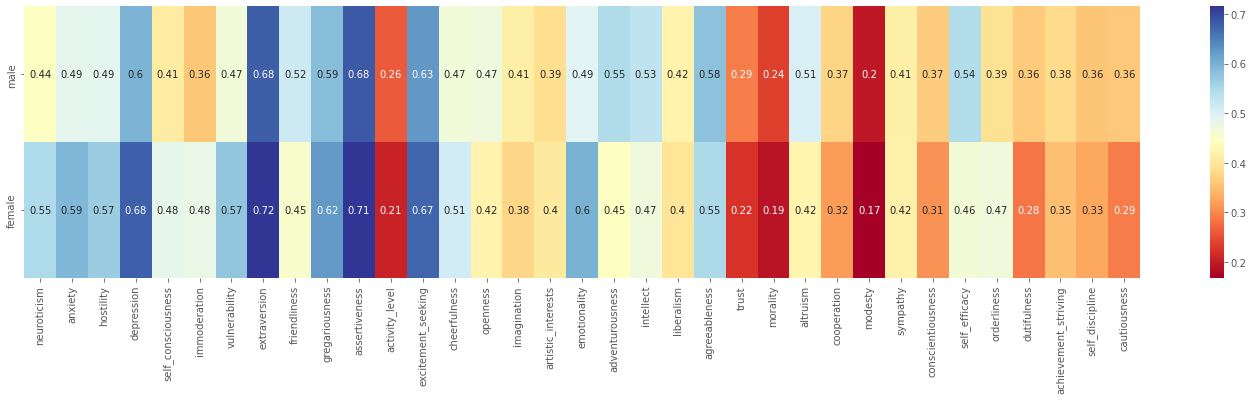

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(overall_personality, ax=ax, annot=True, cmap='RdYlBu')

We can see that males and females are quite different in many dimensions. Let's look at the distributions next.

In [109]:
male_female_personality.head()

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,gender
0,0.444951,0.506500,0.481278,0.581851,0.357581,0.281145,0.412866,0.705507,0.520936,0.548610,...,0.190543,0.425436,0.380044,0.563953,0.260909,0.320197,0.448285,0.358958,0.330454,male
1,0.287246,0.399256,0.323168,0.395128,0.224726,0.151944,0.344133,0.664085,0.634256,0.524753,...,0.284625,0.655728,0.535480,0.749796,0.411484,0.432325,0.538465,0.518574,0.516294,male
2,0.505617,0.573620,0.518448,0.555388,0.357554,0.318163,0.552765,0.734286,0.591221,0.622902,...,0.163598,0.570297,0.365315,0.602720,0.497322,0.383069,0.410406,0.364600,0.353731,male
3,0.579143,0.544741,0.615621,0.749565,0.411137,0.431903,0.446919,0.742793,0.371027,0.451051,...,0.139267,0.555389,0.218612,0.471091,0.195099,0.137256,0.161766,0.251404,0.256394,male
4,0.472975,0.572251,0.557817,0.638027,0.384034,0.331950,0.489380,0.774055,0.724906,0.821787,...,0.289027,0.254055,0.347765,0.440459,0.384731,0.453959,0.434766,0.347046,0.311975,male


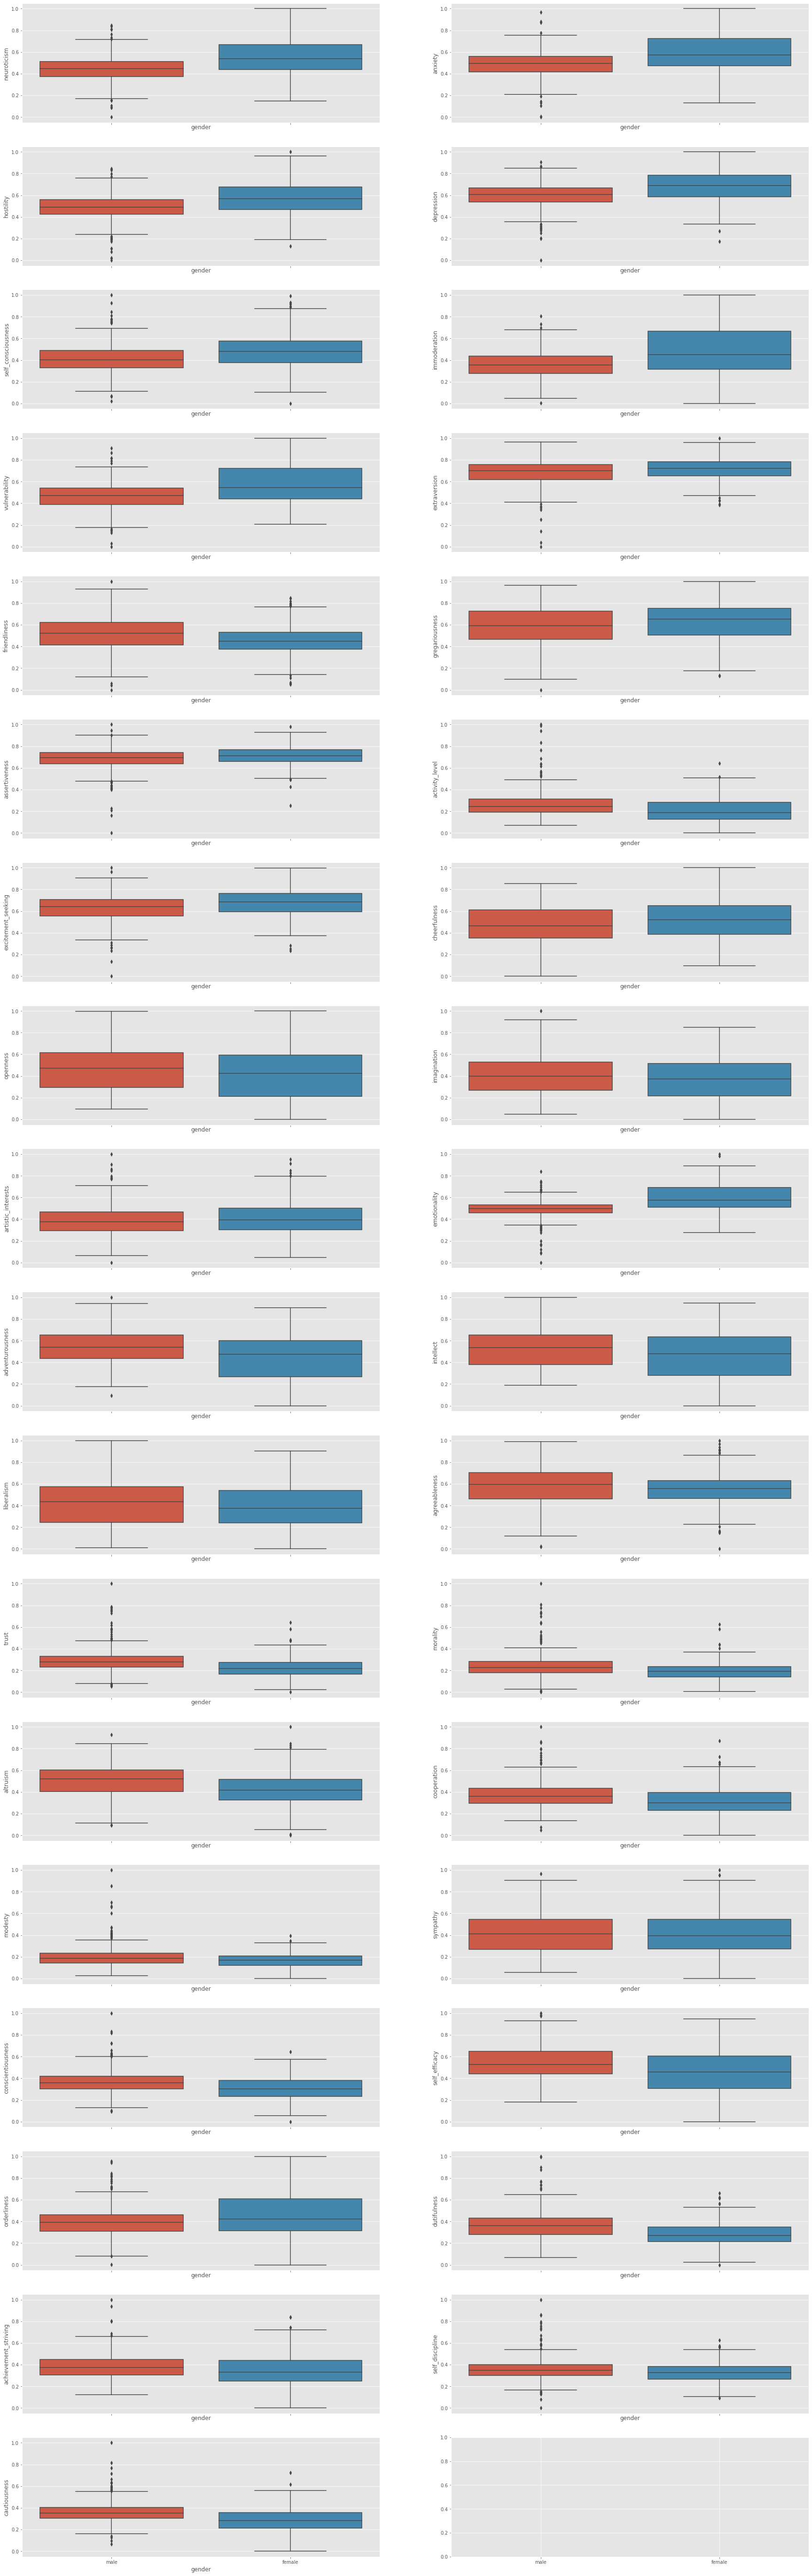

In [149]:
fig, axes = plt.subplots(18, 2, figsize=(30, 100), sharex=True)

for i, attr in enumerate(PERSONALITY_ATTRS):
    sns.boxplot(data=male_female_personality, x='gender', y=attr, ax=axes[i//2, i%2])

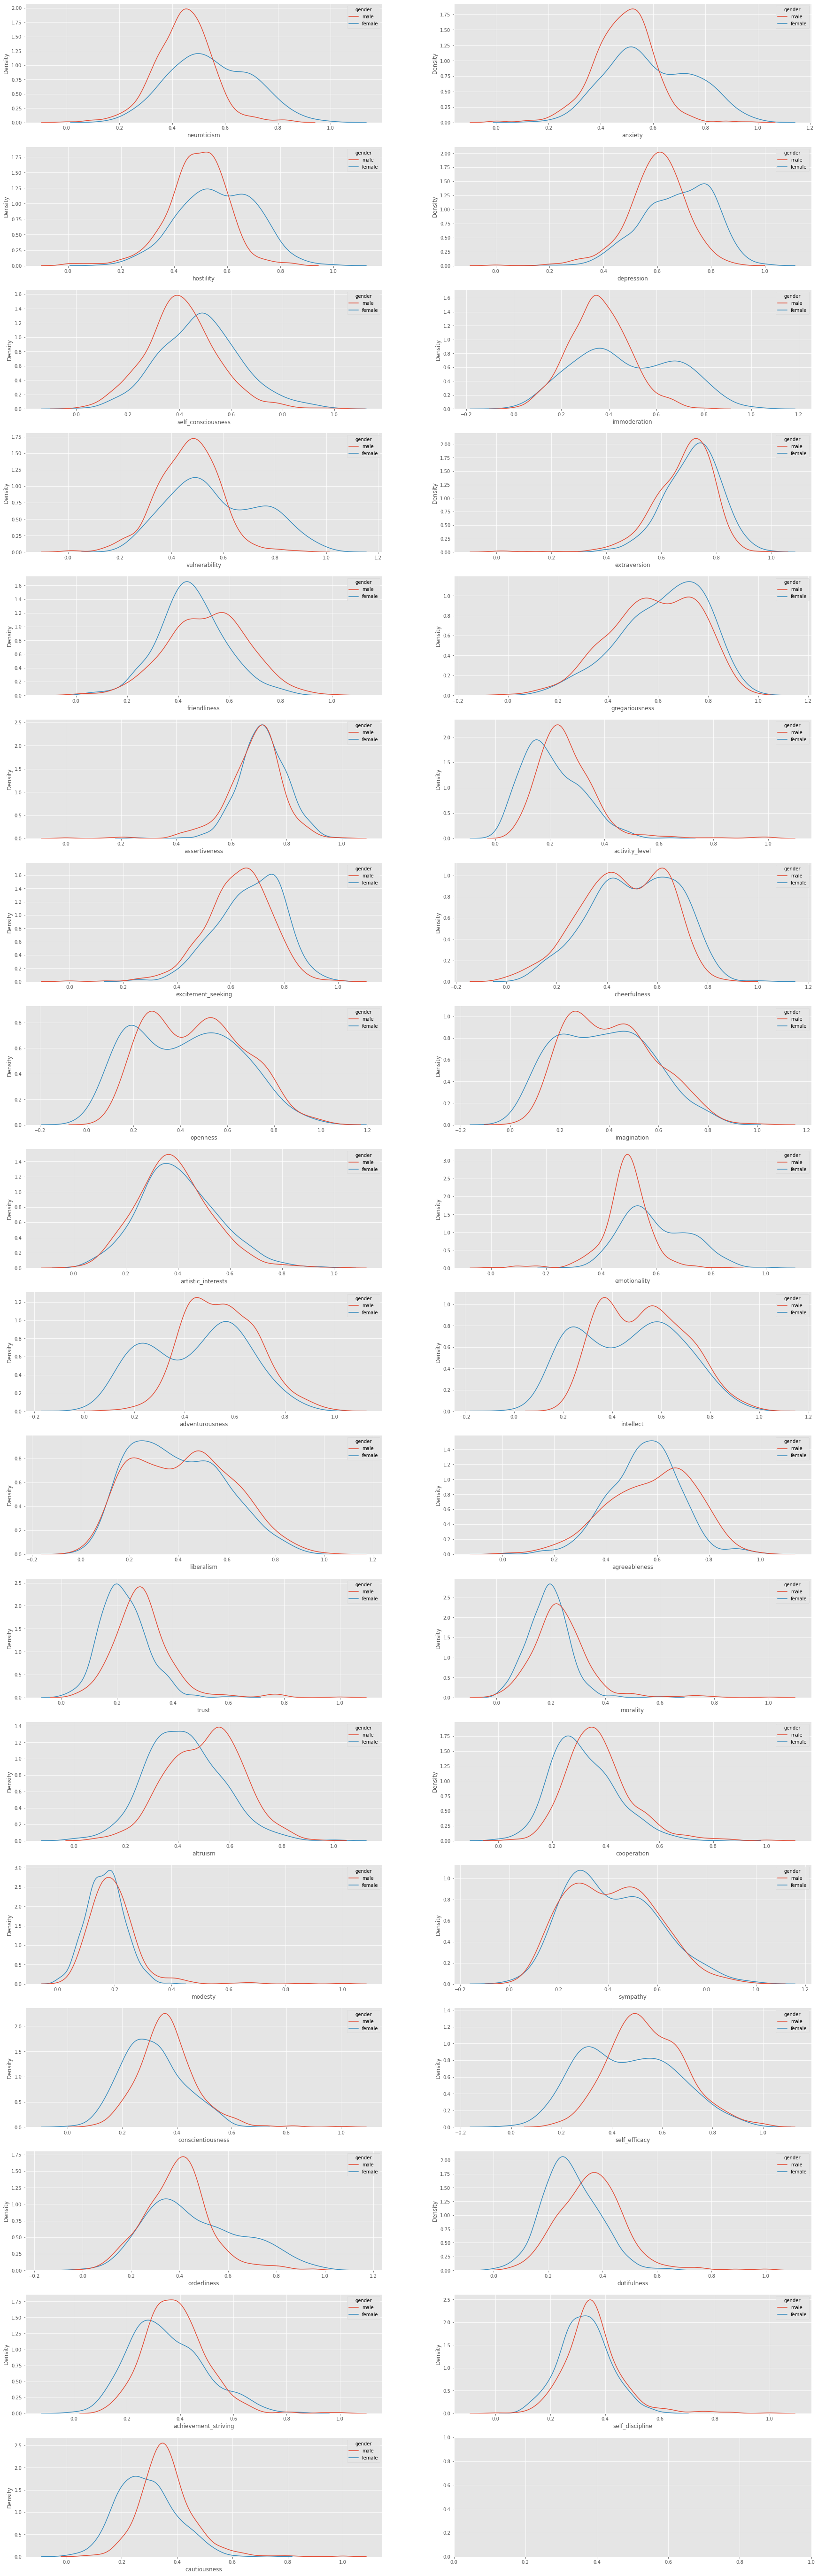

In [150]:
fig, axes = plt.subplots(18, 2, figsize=(30, 100))
for i, attr in enumerate(PERSONALITY_ATTRS):
    sns.kdeplot(data=male_female_personality, x=attr, hue='gender', ax=axes[i//2, i%2])

From the graphs, we can see that women score higher on almost all neuroticism subtypes and emotionality. Men seem to be scoring higher activity level, adventurousness, cautiousness and dutifulness. Let's run some t-tests to see how significant these differences are.

Let's see the standard deviation for neuroticism.

In [176]:
male_female_personality[male_female_personality.gender == 'male']['neuroticism'].std(), male_female_personality[male_female_personality.gender == 'female']['neuroticism'].std()

(0.41282634336055346, 0.5836717207565472)

Since they dont seem to be identical, we will use the t-test without the equal variance assumption and out alternative hypothesis is whether female score is higher.

In [180]:
male_sample = male_female_personality[male_female_personality.gender == 'male']
female_sample = male_female_personality[male_female_personality.gender == 'female']

In [182]:
from scipy.stats import ttest_ind
for attr in ['neuroticism', 'anxiety', 'hostility', 'depression', 'self_consciousness', 'immoderation', 'vulnerability']:
    results = ttest_ind(male_sample[attr], female_sample[attr], alternative='less', equal_var=False)
    print(f"{attr}: {results}")

neuroticism: Ttest_indResult(statistic=-12.214362533292874, pvalue=3.742323857147756e-32)
anxiety: Ttest_indResult(statistic=-11.94386130471783, pvalue=6.602661483005894e-31)
hostility: Ttest_indResult(statistic=-9.709439086996579, pvalue=1.2768133324721119e-21)
depression: Ttest_indResult(statistic=-10.695295387644052, pvalue=1.2833989141377069e-25)
self_consciousness: Ttest_indResult(statistic=-8.02040974641047, pvalue=1.488384913895214e-15)
immoderation: Ttest_indResult(statistic=-10.780198517364163, pvalue=1.034813680141458e-25)
vulnerability: Ttest_indResult(statistic=-11.462945785030781, pvalue=9.845130493555488e-29)


Let's check the same for male on other attributes.

In [183]:
from scipy.stats import ttest_ind
for attr in ['activity_level', 'trust', 'agreeableness', 'cooperation', 'dutifulness', 'cautiousness', 'altruism']:
    results = ttest_ind(female_sample[attr], male_sample[attr], alternative='less', equal_var=False)
    print(f"{attr}: {results}")

activity_level: Ttest_indResult(statistic=-7.723829953209434, pvalue=1.3749382129380096e-14)
trust: Ttest_indResult(statistic=-11.079932499154674, pvalue=3.4255341252366225e-27)
agreeableness: Ttest_indResult(statistic=-3.025203018894087, pvalue=0.0012756147231059458)
cooperation: Ttest_indResult(statistic=-7.2329680569868575, pvalue=4.700699233614916e-13)
dutifulness: Ttest_indResult(statistic=-11.221653208906202, pvalue=7.752987672403517e-28)
cautiousness: Ttest_indResult(statistic=-11.196541622951665, pvalue=8.687924171484748e-28)
altruism: Ttest_indResult(statistic=-9.21839987540552, pvalue=8.712553453358688e-20)


Most of the observations are confirmed by t-tests except the *agreeableness* results are not as significant as others which makes sense, because women are generally more agreeable than men. This and the results on neuroticism levels also match the results from this paper (https://www.frontiersin.org/articles/10.3389/fpsyg.2011.00178/full) on *Gender differences in personality across the ten aspects of the Big Five*. 

Let's see if we can actually predict the gender based solely on personality traits as features.

In [184]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

train_data, test_data = train_test_split(male_female_personality, test_size=0.2)
model = sm.Logit(train_data['gender'].apply(lambda g: g == 'male').astype(int), train_data[PERSONALITY_ATTRS]).fit()

Optimization terminated successfully.
         Current function value: 0.450909
         Iterations 7


In [185]:
preds = model.predict(test_data[PERSONALITY_ATTRS])
accuracy_score(test_data['gender'].apply(lambda g: g == 'male').astype(int), (preds > 0.5).astype(int))

0.815

In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                  800
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                           34
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.3494
Time:                        22:59:07   Log-Likelihood:                -360.73
converged:                       True   LL-Null:                       -554.46
Covariance Type:            nonrobust   LLR p-value:                 1.502e-61
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
neuroticism             -9.1377      3.390     -2.696      0.007     -15.782      -2.494
anxiety                  3.9173      2.839      1.380      0.168      -1.648       9.483
hostility                5.3447      2.758      1.938      0.053      -0.060      10.750
depression              -1.1750      2.829     -0.415      0.678      -6.719       4.369
self_consciousness      -1.6506      1.805     -0.914      0.361      -5.189       1.888
immoderation             1.4115      3.382      0.417      0.676      -5.217       8.040
vulnerability           -0.5761      2.491     -0.231      0.817      -5.458       4.306
extraversion             1.1165      2.122      0.526      0.599      -3.042       5.275
friendliness            -5.1401      2.061     -2.494      0.013      -9.180      -1.100
gregariousness          -1.0026      1.717     -0.584      0.559      -4.368       2.363
assertiveness           -6.4582      3.132     -2.062      0.039     -12.597      -0.319
activity_level           8.1299      2.508      3.242      0.001       3.215      13.045
excitement_seeking       3.4835      1.858      1.875      0.061      -0.157       7.124
cheerfulness            -0.2908      1.879     -0.155      0.877      -3.974       3.392
openness                 0.5316      2.472      0.215      0.830      -4.314       5.377
imagination              1.4480      2.156      0.672      0.502      -2.777       5.673
artistic_interests      -1.6680      1.702     -0.980      0.327      -5.003       1.667
emotionality            -0.1131      1.407     -0.080      0.936      -2.871       2.644
adventurousness          3.0881      1.826      1.691      0.091      -0.490       6.667
intellect               -3.6210      1.699     -2.132      0.033      -6.951      -0.292
liberalism               0.4348      1.699      0.256      0.798      -2.895       3.765
agreeableness            2.4981      2.382      1.049      0.294      -2.171       7.167
trust                    7.2288      3.757      1.924      0.054      -0.136      14.593
morality                -7.3831      3.341     -2.210      0.027     -13.931      -0.835
altruism                 2.4763      2.367      1.046      0.296      -2.164       7.116
cooperation             -3.2316      2.027     -1.594      0.111      -7.205       0.742
modesty                  0.2173      3.134      0.069      0.945      -5.925       6.360
sympathy                 5.5241      3.022      1.828      0.068      -0.398      11.446
conscientiousness        4.3872      2.223      1.974      0.048       0.030       8.744
self_efficacy           -1.9518      2.011     -0.971      0.332      -5.893       1.989
orderliness              0.9665      2.861      0.338      0.736      -4.642       6.575
dutifulness              1.2214      2.838      0.430      0.667      -4.342       6.784
achievement_striving    -4.2145      1.816     -2.320      0.020      -7.775      -0.655
self_discipline         -5.4230      

81% accuracy on the test set. Not too bad. From the model summary, we can see that the main predictors seem to be the neuroticism subtypes.

Let's run some cross-validation and see how robust the model is. We will report the average accuracy scores (since the classes are balanced) and the bootstrapped confidence interval for the score.

In [194]:
from sklearn.linear_model import LogisticRegression

male_female_personality['gender_y'] = male_female_personality['gender'].apply(lambda g: g == 'male').astype(int)
model = LogisticRegression(max_iter=1000)

cross_validate(model, male_female_personality[PERSONALITY_ATTRS], male_female_personality['gender_y'], k_fold=3, seed=42)

{'accuracy_score': 0.7657657657657658,
 'accuracy_conf_interval': (0.750950950950951, 0.7698698698698699)}

Our model seems to be robust and personality scores seem to be a good predictor of the gender.

### Appendix
Here we list some code to generate specific graphs for the data story.

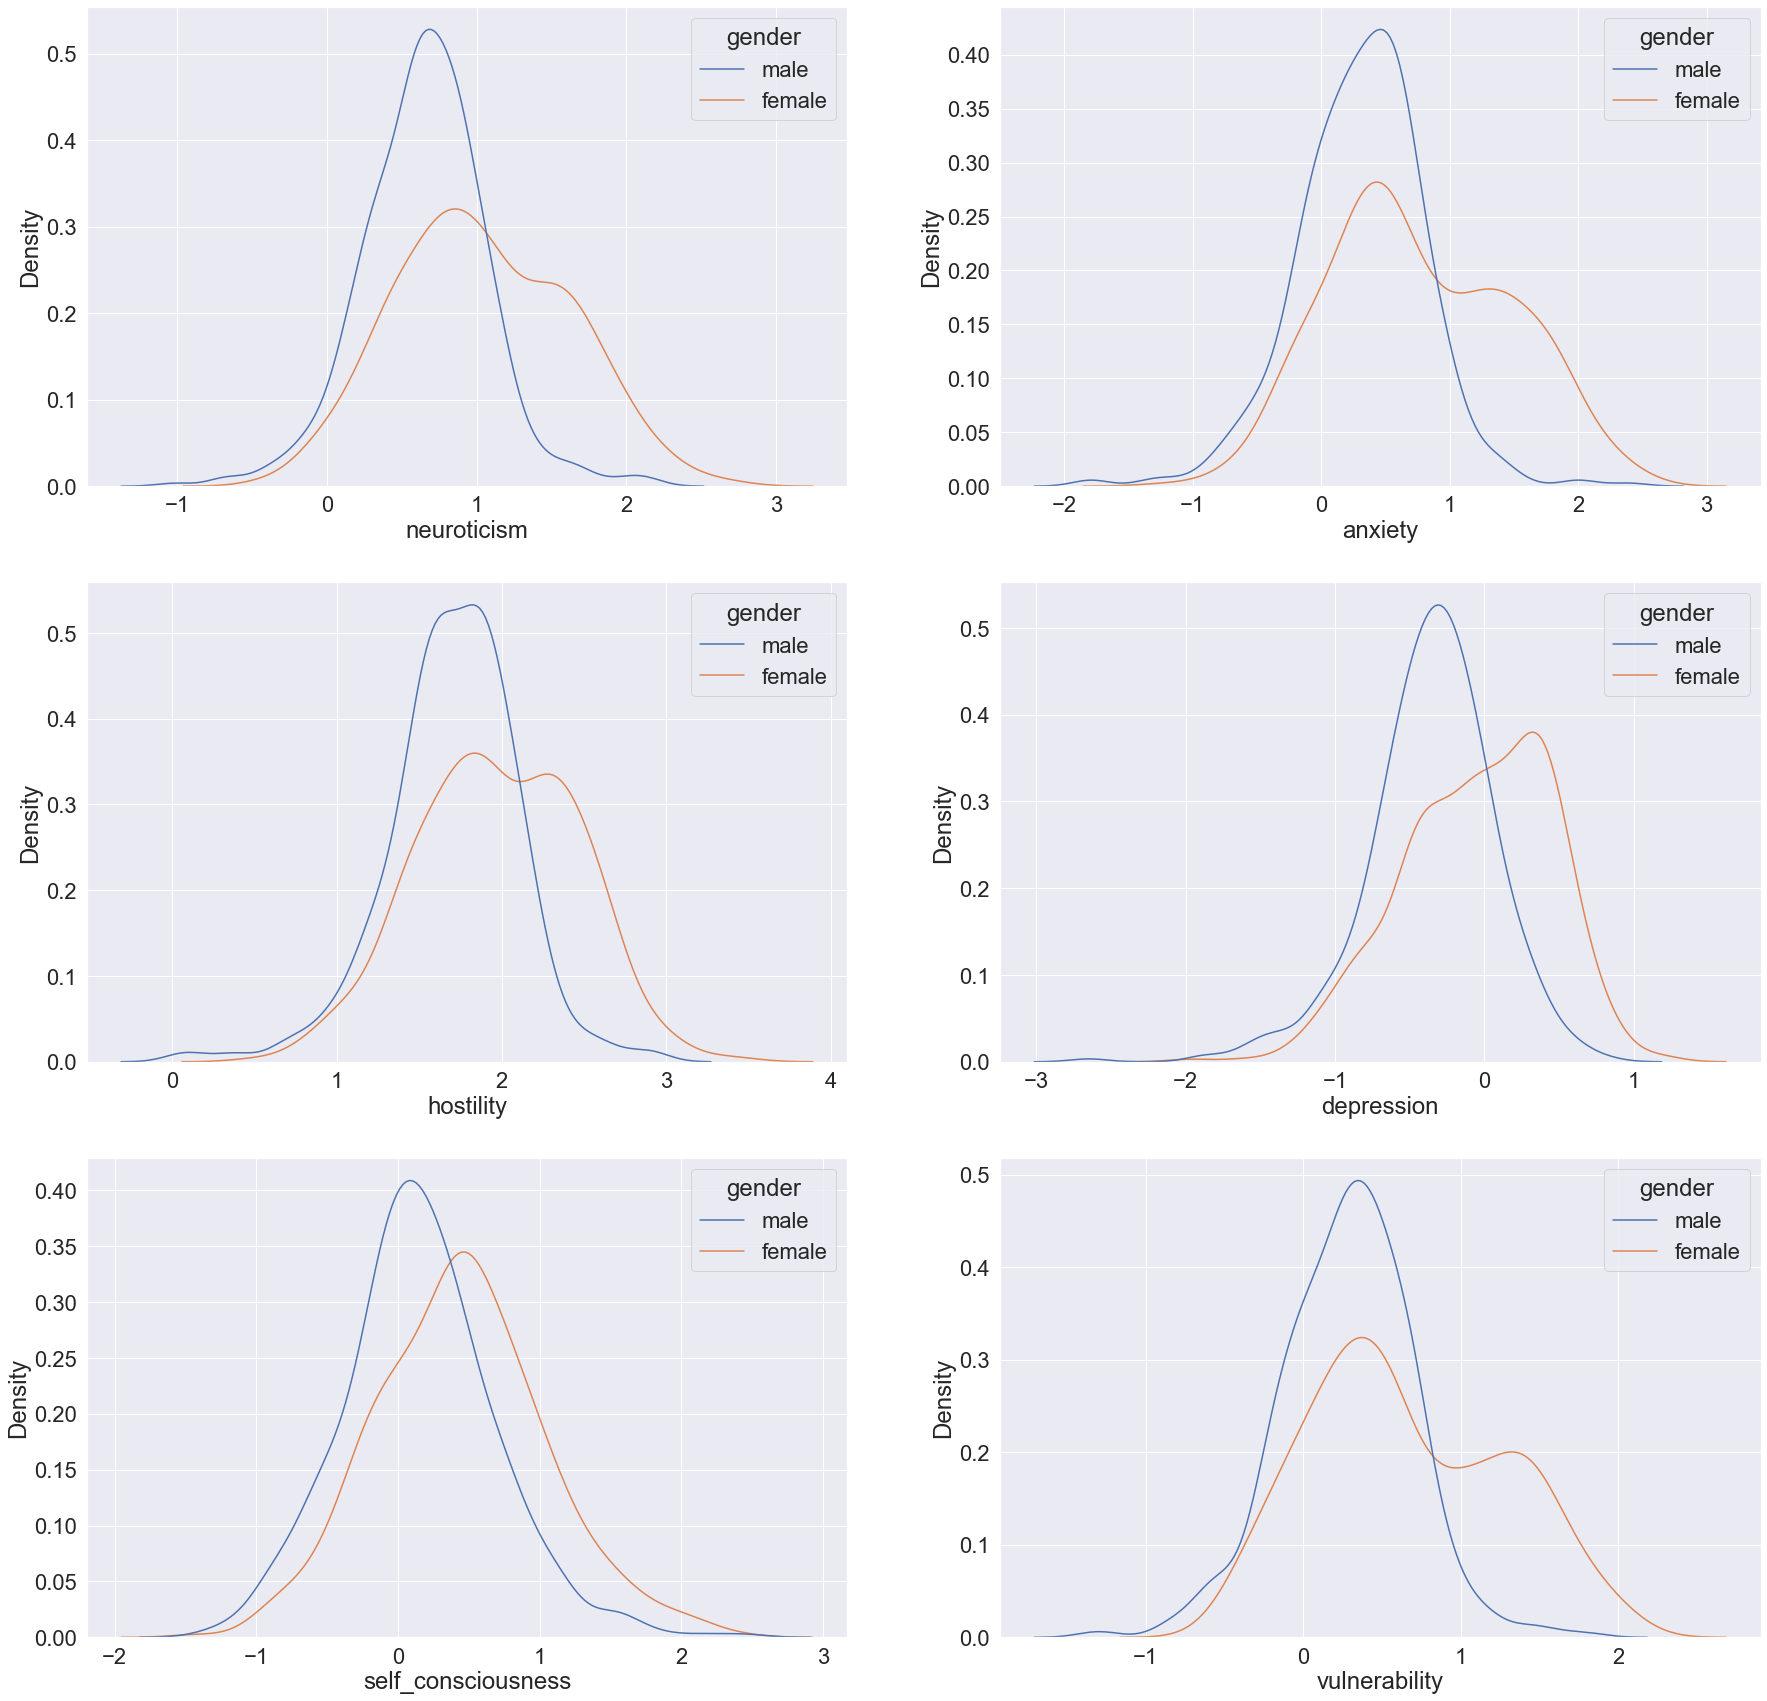

In [203]:
fig, axes = plt.subplots(3, 2, figsize=(30, 30))
for i, attr in enumerate(['neuroticism', 'anxiety', 'hostility', 'depression', 'self_consciousness', 'vulnerability']):
    sns.set(font_scale = 2)
    sns.kdeplot(data=male_female_personality, x=attr, hue='gender', ax=axes[i//2, i%2])

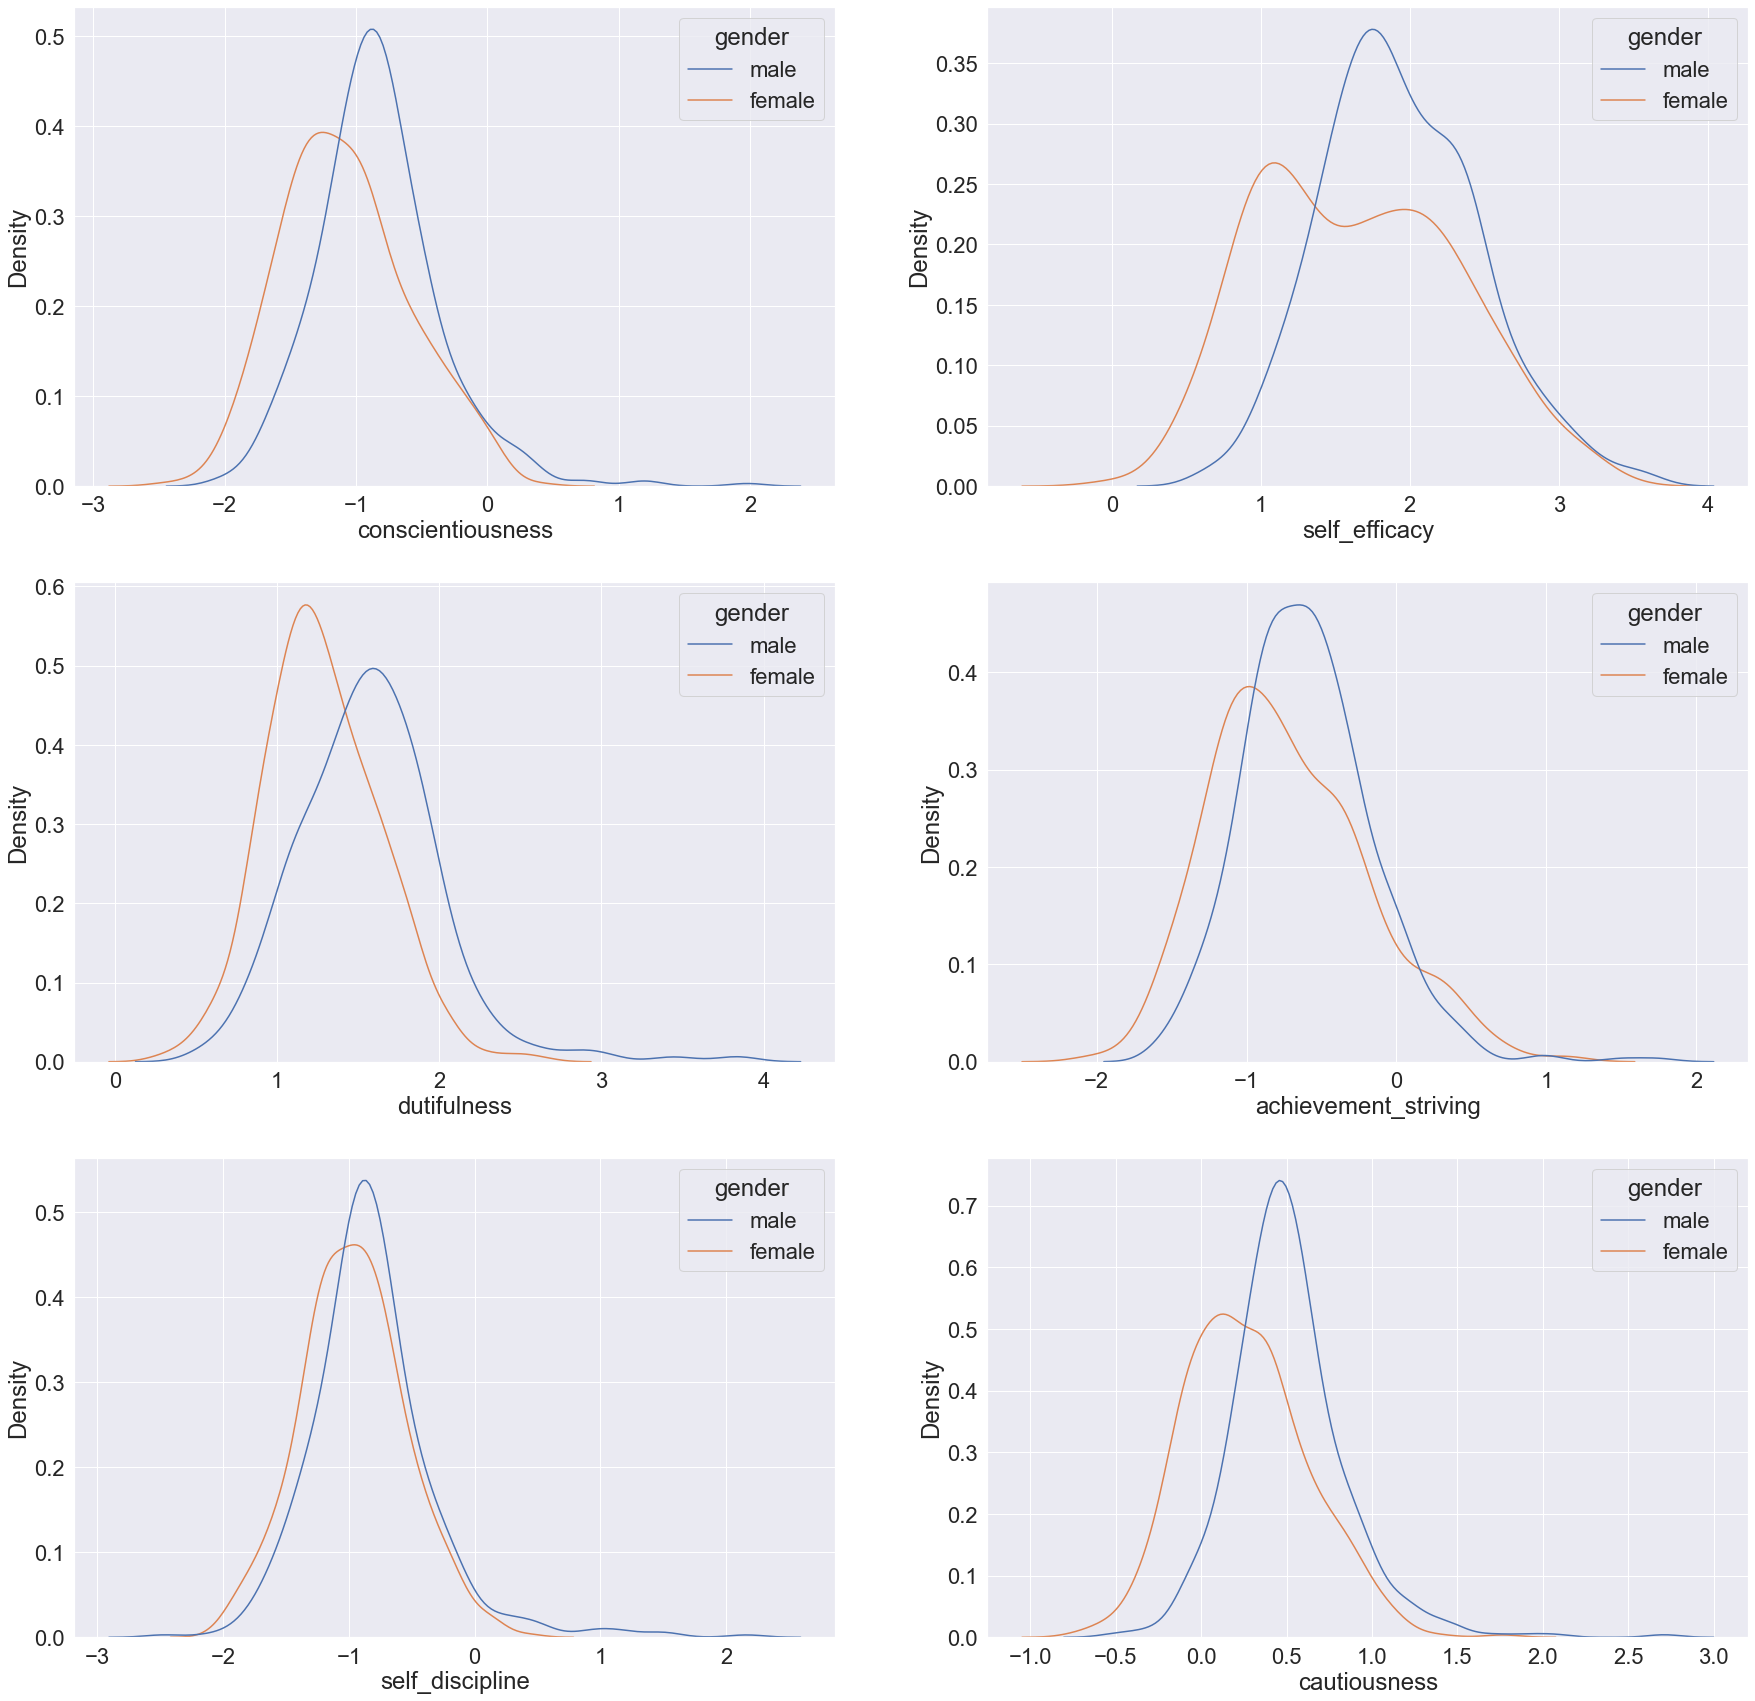

In [204]:
fig, axes = plt.subplots(3, 2, figsize=(30, 30))
for i, attr in enumerate(['conscientiousness', 'self_efficacy', 'dutifulness', 'achievement_striving', 'self_discipline', 'cautiousness']):
    sns.set(font_scale = 2)
    sns.kdeplot(data=male_female_personality, x=attr, hue='gender', ax=axes[i//2, i%2])